In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

# Training the model

In [2]:
dataset_1 = pd.read_csv("C:\\Users\\Nayeem\\Desktop\\Project_Data\\Segmented_Data\\500 ms window_overlap\\Pocket\\p1_pocket_train.csv")

In [3]:
dataset_1.rename(columns={'#->Timestamp':'Timestamp'}, inplace=True)

In [4]:
# dataset_1.fillna((dataset_1).mean, inplace=True)

In [5]:
# dataset_1.isnull().values.sum()

In [6]:
dataset_1.head()

,Timestamp,label,TYPE_ACCELEROMETER-Xmean,TYPE_ACCELEROMETER-Ymean,TYPE_ACCELEROMETER-Zmean,TYPE_GYROSCOPE-Xmean,TYPE_GYROSCOPE-Ymean,TYPE_GYROSCOPE-Zmean,TYPE_ACCELEROMETER-Xvar,TYPE_ACCELEROMETER-Yvar,...,TYPE_ACCELEROMETER-Zmin,TYPE_GYROSCOPE-Xmin,TYPE_GYROSCOPE-Ymin,TYPE_GYROSCOPE-Zmin,TYPE_ACCELEROMETER-Xmax,TYPE_ACCELEROMETER-Ymax,TYPE_ACCELEROMETER-Zmax,TYPE_GYROSCOPE-Xmax,TYPE_GYROSCOPE-Ymax,TYPE_GYROSCOPE-Zmax
0,0.958,Stand,-0.152937,-9.743149,-0.056403,0.006416,0.059788,-0.001994,0.025740,0.004737,...,-0.248993,-0.022354,0.026611,-0.027679,0.088577,-9.636658,0.186737,0.035156,0.093735,0.026627
1,1.458,Stand,-0.227351,-9.694498,0.112333,0.019559,0.050081,0.017773,0.160059,0.045491,...,-0.110123,-0.011719,-0.089478,-0.018097,0.347153,-9.344559,0.392639,0.072433,0.223694,0.056458
2,1.969,Stand,-0.300226,-9.750715,0.297544,0.011017,0.008087,0.017089,0.024874,0.002469,...,0.090973,-0.013840,-0.035156,-0.003174,0.002380,-9.641449,0.512344,0.047943,0.050049,0.055389
3,2.482,Stand,-0.405570,-9.741425,0.292659,-0.007070,0.038569,0.004544,0.003901,0.003014,...,0.086182,-0.035141,0.018097,-0.008499,-0.265747,-9.636658,0.478836,0.009583,0.056442,0.025574
4,2.979,Stand,-0.343224,-9.747170,0.213939,-0.012390,0.040039,-0.008165,0.005137,0.004216,...,0.052658,-0.033005,-0.023438,-0.026611,-0.217865,-9.593552,0.363907,0.009583,0.084137,0.007462


In [7]:
from sklearn.model_selection import train_test_split
X_train = dataset_1.drop("label", axis = 1)
y_train = dataset_1["label"]

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_1 = StandardScaler()
X_train = sc_1.fit_transform(X_train)

In [9]:
X_train.shape, y_train.shape

((339, 31), (339,))

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

In [11]:
cross_val_train = cross_val_score(model, X_train, y_train, cv=10)

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [12]:
cross_val_train = np.mean(cross_val_train)

In [13]:
cross_val_train

0.8371657754010695

In [14]:
# model.fit(X_train, y_train)

In [15]:
# model.score(X_train, y_train)

# Testing the model

In [16]:
dataset_2 = pd.read_csv("C:\\Users\\Nayeem\\Desktop\\Project_Data\\Segmented_Data\\500 ms window_overlap\\Pocket\\p1_pocket_test.csv")

In [17]:
dataset_2.rename(columns={'#->Timestamp':'Timestamp'}, inplace=True)

In [18]:
dataset_2.head()

,Timestamp,label,TYPE_GYROSCOPE-Xmean,TYPE_GYROSCOPE-Ymean,TYPE_GYROSCOPE-Zmean,TYPE_ACCELEROMETER-Xmean,TYPE_ACCELEROMETER-Ymean,TYPE_ACCELEROMETER-Zmean,TYPE_GYROSCOPE-Xvar,TYPE_GYROSCOPE-Yvar,...,TYPE_GYROSCOPE-Zmin,TYPE_ACCELEROMETER-Xmin,TYPE_ACCELEROMETER-Ymin,TYPE_ACCELEROMETER-Zmin,TYPE_GYROSCOPE-Xmax,TYPE_GYROSCOPE-Ymax,TYPE_GYROSCOPE-Zmax,TYPE_ACCELEROMETER-Xmax,TYPE_ACCELEROMETER-Ymax,TYPE_ACCELEROMETER-Zmax
0,0.448,Stand,0.106451,-0.030215,-0.522404,0.046547,4.332539,8.868978,0.034596,0.230384,...,-1.521195,-0.885849,3.861847,6.653473,0.408005,0.416504,0.027679,2.193085,5.202591,9.871292
1,0.947,Stand,1.224677,-2.922739,1.247397,3.253040,-0.563978,5.455228,0.643789,0.631584,...,-0.665787,0.871475,-4.503479,4.335892,2.441589,-1.683105,3.907379,8.360550,2.980774,8.391663
2,1.715,Stand,-0.340697,0.741546,0.082131,11.586876,-0.840840,2.295366,0.390430,1.149477,...,-0.951279,3.141190,-3.689453,-3.689453,0.414398,3.227737,1.437027,22.529434,2.923309,8.027756
3,2.215,Stand,-0.126304,-0.939390,1.454296,7.659139,-7.151281,0.479031,0.913096,0.529824,...,-1.222916,2.853882,-12.140991,-2.008728,1.681000,0.085205,6.116730,14.800949,-2.272095,3.157944
4,2.718,Stand,0.190332,0.183778,0.806543,4.229689,-7.669578,2.246519,0.089497,0.792256,...,-0.224762,-4.299972,-11.494553,-0.773315,0.938507,2.096436,2.523605,12.890381,-3.909729,4.537003


In [19]:
from sklearn.model_selection import train_test_split
X_test = dataset_2.drop("label", axis = 1)
y_test = dataset_2["label"]

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_2 = StandardScaler()
X_test = sc_2.fit_transform(X_test)

In [21]:
ts = dataset_2["Timestamp"]

In [22]:
cross_val_test = cross_val_score(model, X_test, y_test, cv=10)

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [23]:
cross_val_test = np.mean(cross_val_test)

In [24]:
cross_val_test

0.7979166666666667

In [25]:
# model.score(X_test, y_test)

## Getting accuracy, precision, recall and f1-score with our best model

In [26]:
model_accuracy = cross_val_score(model, X_test, y_test, cv=10, scoring = "accuracy")
model_accuracy = np.mean(model_accuracy)
model_accuracy

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7916666666666666

In [27]:
model_precision = cross_val_score(model, X_test, y_test, cv=10, scoring = "precision_micro")
model_precision = np.mean(model_precision)
model_precision

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7983333333333333

In [28]:
model_recall = cross_val_score(model, X_test, y_test, cv=10, scoring = "recall_micro")
model_recall = np.mean(model_recall)
model_recall

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7849999999999999

In [29]:
model_f1 = cross_val_score(model, X_test, y_test, cv=10, scoring = "f1_micro")
model_f1 = np.mean(model_f1)
model_f1

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.81125

## Visualizing

Accuracy of the model is: 79.17%
Precision of the model is: 0.80
Recall of the model is: 0.78
F1-score of the model is: 0.81


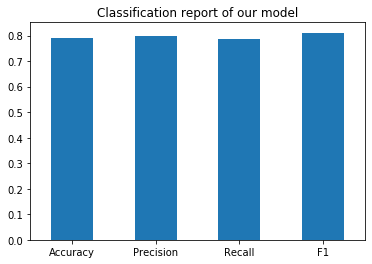

In [30]:
# Visualize our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": model_accuracy,
                          "Precision": model_precision,
                          "Recall": model_recall,
                          "F1": model_f1}, index=[0])
cv_metrics.T.plot.bar(title="Classification report of our model",legend=False)
plt.xticks(rotation=0);
print(f"Accuracy of the model is: {model_accuracy *100:.2f}%")
print(f"Precision of the model is: {model_precision:.2f}")
print(f"Recall of the model is: {model_recall:.2f}")
print(f"F1-score of the model is: {model_f1:.2f}")

In [31]:
y_predict = cross_val_predict(model, X_test, y_test, cv=10)

C:\Users\Nayeem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [32]:
y_predict;

## Confusion matrics

In [33]:
cm = confusion_matrix(y_test, y_predict)

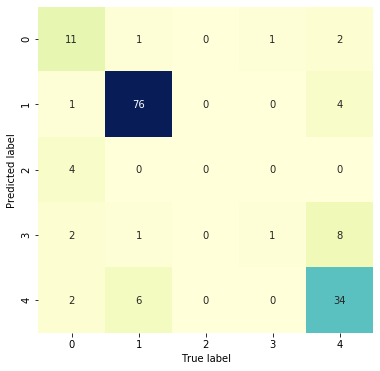

In [34]:
def plot_conf_mat(cm):
    fig, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(cm, annot=True,cbar=False, cmap="YlGnBu", fmt="d")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(cm)

In [35]:
df = pd.DataFrame({"Timestamp": ts,
                   "Predicted_value": y_predict,
                   })

In [36]:
pd.set_option('display.max_rows', df.shape[0]+1)
df

,Timestamp,Predicted_value
0,0.448,Stand
1,0.947,Stand
2,1.715,Stand
3,2.215,Stand
4,2.718,Stand
5,3.218,Stand
6,3.718,Stand
7,4.216,Stand
8,4.722,Stand
9,5.219,Stand


In [37]:
df.to_csv("RFC_P1_pocket.csv", index = False)